# Machine Learning on PGA Tour - Classification Methods

In [25]:
# Imports
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("../data/pga_data.csv")
df

,Name,Season,Ranking,Driving Distance,Driving Accuracy,Club Head Speed,Ball Speed,Spin Rate,Eligible
0,Justin Thomas,2017,1,309.1,54.64,116.52,174.84,2320.1,1.0
1,Jordan Spieth,2017,2,294.6,58.67,112.66,168.55,2439.6,1.0
2,Xander Schauffele,2017,3,306.5,58.80,118.33,174.24,2518.8,1.0
3,Dustin Johnson,2017,4,314.8,54.02,121.45,180.66,2499.9,1.0
4,Jon Rahm,2017,5,305.3,58.27,116.42,174.53,2193.0,1.0
...,...,...,...,...,...,...,...,...,...
611,C.T. Pan,2021,121,296.3,61.03,111.20,167.34,2129.2,-1.0
612,Matt Kuchar,2021,122,288.0,65.81,108.60,162.18,2419.4,-1.0
613,Brice Garnett,2021,123,288.1,70.86,109.53,164.71,2539.5,-1.0
614,Scott Stallings,2021,124,298.2,58.83,115.96,173.80,2516.0,-1.0


Support Vector Machine

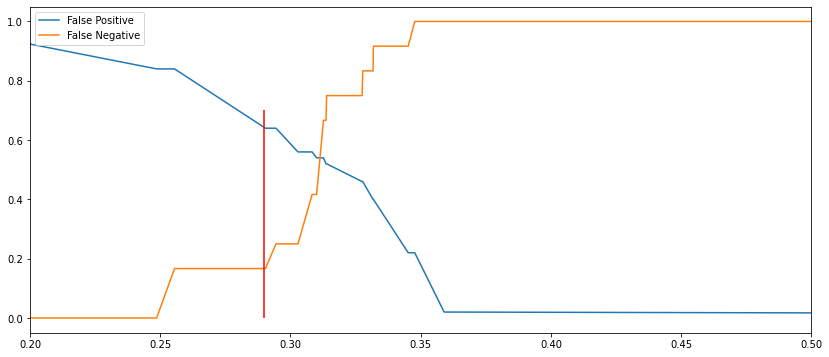

In [75]:
X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
clf = svm.SVC(probability=True, random_state=12)
clf.fit(X_train, y_train)

# PLOTTING FALSE POSITIVES AND TRUE POSITIVES
plt.figure(figsize=(14, 6))

pos_predictions = clf.predict_proba(X_test)[:, 1]
false_positives, true_positives, thresholds = metrics.roc_curve(y_test, pos_predictions)
plt.plot(thresholds, false_positives, label="False Positive")
plt.plot(thresholds, 1 - true_positives, label="False Negative")
plt.vlines(x=0.29, ymin=0, ymax=0.7, color="red")
plt.xlim((0.2, 0.5))
plt.legend();

In [81]:
y_pred = np.where(pos_predictions > 0.29, 1, -1)
confusion_matrix(y_test, y_pred)

array([[18, 32],
       [ 2, 10]])

In [82]:
f1_score(y_test, y_pred)

0.37037037037037035

In [83]:
accuracy_score(y_test, y_pred)

0.45161290322580644

In [84]:
recall_score(y_test, y_pred)

0.8333333333333334

In [85]:
precision_score(y_test, y_pred)

0.23809523809523808

Logistic Regression

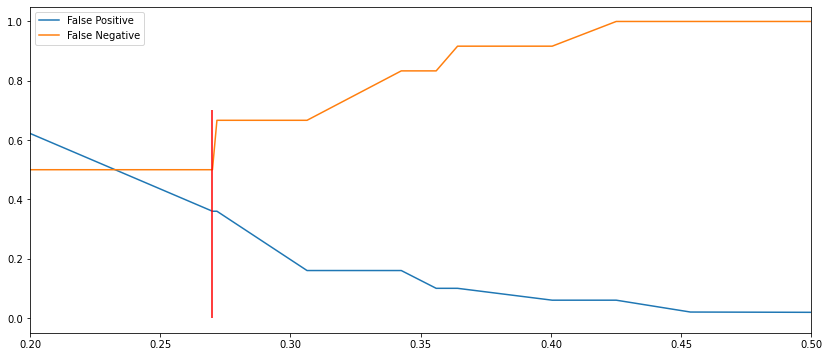

In [89]:
X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
lr = LogisticRegression(random_state=12)
lr.fit(X_train, y_train)

# PLOTTING FALSE POSITIVES AND TRUE POSITIVES
plt.figure(figsize=(14, 6))

pos_predictions = lr.predict_proba(X_test)[:, 1]
false_positives, true_positives, thresholds = metrics.roc_curve(y_test, pos_predictions)
plt.plot(thresholds, false_positives, label="False Positive")
plt.plot(thresholds, 1 - true_positives, label="False Negative")
plt.vlines(x=0.27, ymin=0, ymax=0.7, color="red")
plt.xlim((0.2, 0.5))
plt.legend();

In [94]:
y_pred = np.where(pos_predictions > 0.27, 1, -1)
confusion_matrix(y_test, y_pred)

array([[32, 18],
       [ 6,  6]])

In [95]:
f1_score(y_test, y_pred)

0.3333333333333333

In [96]:
accuracy_score(y_test, y_pred)

0.6129032258064516

In [97]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.5, 0.25)

Decision Tree

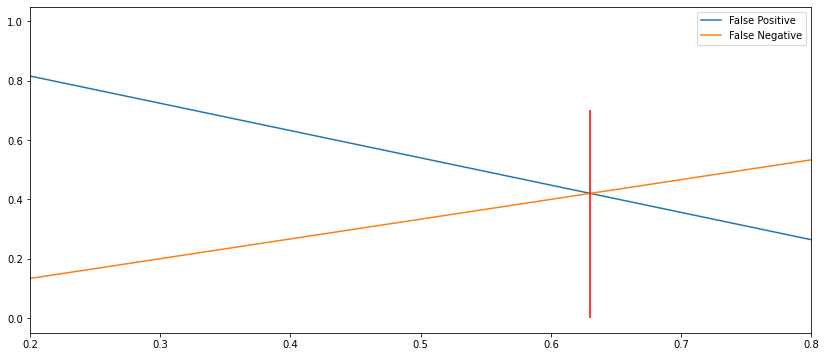

In [58]:
from sklearn.tree import DecisionTreeClassifier

X = df.iloc[:, 3:8].to_numpy()
y = df.iloc[:, 8].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=12)
dtc = DecisionTreeClassifier(random_state=12)
dtc.fit(X_train, y_train)

# PLOTTING FALSE POSITIVES AND TRUE POSITIVES
plt.figure(figsize=(14, 6))

pos_predictions = dtc.predict_proba(X_test)[:, 1]
false_positives, true_positives, thresholds = metrics.roc_curve(y_test, pos_predictions)
plt.plot(thresholds, false_positives, label="False Positive")
plt.plot(thresholds, 1 - true_positives, label="False Negative")
plt.vlines(x=0.63, ymin=0, ymax=0.7, color="red")
plt.xlim((0.2, 0.8))
plt.legend();

In [59]:
y_pred = np.where(pos_predictions > 0.63, 1, -1)
confusion_matrix(y_test, y_pred)

array([[46,  4],
       [ 8,  4]])

In [60]:
accuracy_score(y_test, y_pred)

0.8064516129032258

In [61]:
f1_score(y_test, y_pred)

0.4

In [63]:
recall_score(y_test, y_pred), precision_score(y_test, y_pred)

(0.3333333333333333, 0.5)